# **Programmer votre IA pour acheter votre voiture**

## **1. La première étape est la récupération des données.**
Nous utiliserons la bibliothèque de science des données appelée Pandas pour charger
l'ensemble des données. Au travers de Pandas, il est possible de lire le fichier de données
(carData.csv). Les données seront ensuite affectées et stockées dans une variable, par
exemple : car_data.

#### Les données sont dans le fichier carData.csv et seront affectées à la variable carData.

In [1]:
import pandas

# Ouverture du fichier source et affectation des données à la variable car_data
car_data= pandas.read_csv("carData.csv")

#### **Note de cours**  
Source m'ayant permis de commencer avec panda:  
http://eric.univ-lyon2.fr/~ricco/tanagra/fichiers/fr_Tanagra_Data_Manipulation_Pandas.pdf


## **2. Explorer les données.**
Parcourir les colonnes pour s'approprier les données. Quelle est la taille du jeux de
données. Calculer quelques statistiques de base (moyenne, médiane, quartile, tracer la
distribution avec Matplotlib (histogramme).

#### **Quelques caractéristiques de la table de données:**  
Taille et statistique de base.

In [4]:
# Nombre de lignes et de colonnes de la table de données
print("Caractéristique de la table de données:")
print("La table comporte",car_data.shape[0],"lignes et",car_data.shape[1],"colonnes soit",\
      car_data.shape[0]*car_data.shape[1],"données.\n",)

print("\nNom des différentes colonnes et type de leurs données:")
#colonne= []
for col in car_data.columns:
    print("Colonne",col,"de type", car_data[col].dtype)
#    colonne.append(col)
#print(colonne)

print("\nStatistique sur la colonnes 'Selling_Price'.")
print("Moyenne:",car_data['Selling_Price'].mean())
print("L'écart type du prix des voiture:",car_data['Selling_Price'].std())
print("Prix de la voiture la moins chère:",car_data['Selling_Price'].min())
print("Prix de la voiture la plus chère:",car_data['Selling_Price'].max())
print("Distribution des prix: 1er quartile (25%):",car_data['Selling_Price'].quantile(0.25))
print("Distribution des prix: Prix médian:",car_data['Selling_Price'].quantile(0.5))
print("Distribution des prix: dernier quartile (75%):",car_data['Selling_Price'].quantile(0.75))
print("\nDe la voiture la moins chère jusqu'à la plus chère:")
print("De la moins chère à la plus chère:",car_data.sort_values(by='Selling_Price'))

print("\nInfos colonnes:\n",car_data.describe())

Caractéristique de la table de données:
La table comporte 301 lignes et 9 colonnes soit 2709 données.


Nom des différentes colonnes et type de leurs données:
Colonne Car_Name de type object
Colonne Year de type int64
Colonne Selling_Price de type float64
Colonne Present_Price de type float64
Colonne Kms_Driven de type int64
Colonne Fuel_Type de type object
Colonne Seller_Type de type object
Colonne Transmission de type object
Colonne Owner de type int64

Statistique sur la colonnes 'Selling_Price'.
Moyenne: 4.661295681063127
L'écart type du prix des voiture: 5.082811556177804
Prix de la voiture la moins chère: 0.1
Prix de la voiture la plus chère: 35.0
Distribution des prix: 1er quartile (25%): 0.9
Distribution des prix: Prix médian: 3.6
Distribution des prix: dernier quartile (75%): 6.0

De la voiture la moins chère jusqu'à la plus chère:
De la moins chère à la plus chère:                Car_Name  Year  Selling_Price  Present_Price  Kms_Driven  \
200    Bajaj Pulsar 150  2006        

#### **Utilisation de matplotlib**

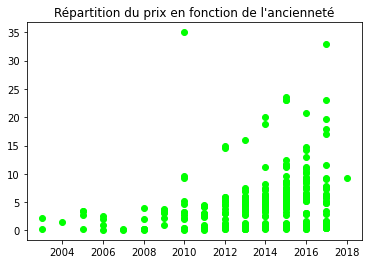

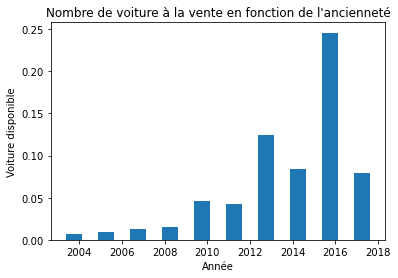

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


"""
Liste des données de la base:
car_data['Car_Name'], car_data['Present_Price'], car_data['Kms_Driven'], car_data['Fuel_Type'],
car_data['Seller_Type'], car_data['Transmission'], car_data['Owner'], car_data['Selling_Price'],
car_data['Year']
"""

plt.plot(car_data['Year'],car_data['Selling_Price'],linestyle = 'none',marker = 'o',c = 'lime')
plt.title("Répartition du prix en fonction de l'ancienneté")
plt.show()

plt.title("Nombre de voiture à la vente en fonction de l'ancienneté")
res = plt.hist(car_data['Year'],rwidth = 0.5, density= True)
plt.xlabel('Année')
plt.ylabel('Voiture disponible')

#car_data['Selling_Price'].plt.plot()
#car_data['Selling_Price'].plot.kde()
#plt.axis([0, 301, 0, 35])
plt.show()

#### **Notes de cours & ressources** 
Site bien fait et en français pour python et ses bibliothèques (notamment matplot, seaborn,...  
http://www.python-simple.com/python-matplotlib/matplotlib-intro.php

## **3 Chargement des données dans une base de données MySQL.**

In [48]:
import mysql.connector
import sqlalchemy
import pymysql

baseDeDonnees = mysql.connector.connect(host="localhost",user="jpphi",password="jpphi", database="toto")
curseur = baseDeDonnees.cursor()
curseur.execute("SELECT * FROM carData_csv")

print(curseur.fetchall())

baseDeDonnees.close()

"""
Liste des données de la base:
car_data['Car_Name'], car_data['Present_Price'], car_data['Kms_Driven'], car_data['Fuel_Type'],
car_data['Seller_Type'], car_data['Transmission'], car_data['Owner'], car_data['Selling_Price'],
car_data['Year']
"""

[('ritz', '2014', '3.35', '5.59', '27000', 'Petrol', 'Dealer', 'Manual', '0'), ('sx4', '2013', '4.75', '9.54', '43000', 'Diesel', 'Dealer', 'Manual', '0'), ('ciaz', '2017', '7.25', '9.85', '6900', 'Petrol', 'Dealer', 'Manual', '0'), ('wagon r', '2011', '2.85', '4.15', '5200', 'Petrol', 'Dealer', 'Manual', '0'), ('swift', '2014', '4.6', '6.87', '42450', 'Diesel', 'Dealer', 'Manual', '0'), ('vitara brezza', '2018', '9.25', '9.83', '2071', 'Diesel', 'Dealer', 'Manual', '0'), ('ciaz', '2015', '6.75', '8.12', '18796', 'Petrol', 'Dealer', 'Manual', '0'), ('s cross', '2015', '6.5', '8.61', '33429', 'Diesel', 'Dealer', 'Manual', '0'), ('ciaz', '2016', '8.75', '8.89', '20273', 'Diesel', 'Dealer', 'Manual', '0'), ('ciaz', '2015', '7.45', '8.92', '42367', 'Diesel', 'Dealer', 'Manual', '0'), ('alto 800', '2017', '2.85', '3.6', '2135', 'Petrol', 'Dealer', 'Manual', '0'), ('ciaz', '2015', '6.85', '10.38', '51000', 'Diesel', 'Dealer', 'Manual', '0'), ('ciaz', '2015', '7.5', '9.94', '15000', 'Petrol',

"\nListe des données de la base:\ncar_data['Car_Name'], car_data['Present_Price'], car_data['Kms_Driven'], car_data['Fuel_Type'],\ncar_data['Seller_Type'], car_data['Transmission'], car_data['Owner'], car_data['Selling_Price'],\ncar_data['Year']\n"

#### **Note de cours & ressources**

## **4. Visualiser les données grâce à la librairie Seaborn.**

Notamment avec le type de tracé `catplot`, expliquer dans quel cas ce type de tracé est
pertinent.

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# seaborn 4plot

"""
sns.heatmap(car_data.corr(), annot=True, cmap='Greens')
plt.title("Matrice de corrélation entre les différentes caractéristiques des annoncées\n", fontsize=18,\
          color='#009432')

g = sns.lmplot("Year","Selling_Price",hue ='Fuel_Type' ,data=car_data)
"""


# faire les box plot

#### **Notes de cours & ressources** 
Site bien fait et en français pour python et ses bibliothèques (notamment matplot, seaborn,...  
http://www.python-simple.com/python-matplotlib/matplotlib-intro.php

## **5. Quantifier la relation entre l'âge et le prix de vente**

#### Réaliser une veille sur la régression linéaire.

#### **0. Pour quatifier la relation âge/prix de vente, recherche d'une corrélation éventuelle**

Matrice de correllation:
Correlation Année/Prix:
 [[1.         0.23614098]
 [0.23614098 1.        ]] 
Pour qu'il y ai correlation, il faut un nombre dont la valeur absolu est comprise entre 0.8 et 1.
Il n'y a pas de correllation entre le prix de vente et l'année.

Matrice de correllation:
Correlation Année/Prix vente/Prix neuf/kilomètre parcouru:

[[ 1.          0.23614098  0.87898255  0.02918709]
 [ 0.23614098  1.         -0.04758421 -0.52434204]
 [ 0.87898255 -0.04758421  1.          0.20364703]
 [ 0.02918709 -0.52434204  0.20364703  1.        ]]
La seule correllation qui apparait est entre le prix de vente et le prix du véhicule neuf ce qui a peut d'intérêt


Text(0.5, 1.0, 'Corrélation entre les différentes données du tableur\n')

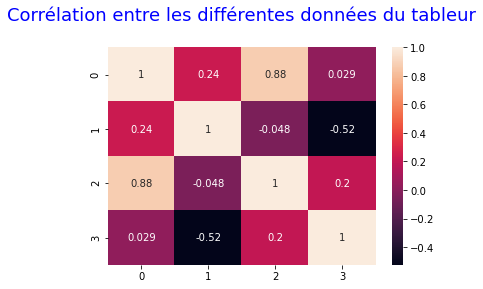

In [50]:
print("Matrice de correllation:\nCorrelation Année/Prix:\n", \
      np.corrcoef(car_data['Selling_Price'],car_data['Year']),\
      "\nPour qu'il y ai correlation, il faut un nombre dont la valeur absolu est \
comprise entre 0.8 et 1.\nIl n'y a pas de correllation entre le prix de vente et l'année.")
      
print("\nMatrice de correllation:\nCorrelation Année/Prix vente/Prix neuf/kilomètre parcouru:\n")
mat2=[car_data['Selling_Price'],car_data['Year'],car_data['Present_Price'],car_data['Kms_Driven']]
print(np.corrcoef(mat2))
print("La seule correllation qui apparait est entre le prix de vente et le prix du véhicule neuf \
ce qui a peut d'intérêt")

sns.heatmap(np.corrcoef(mat2),annot= True)
plt.title("Corrélation entre les différentes données du tableur\n", fontsize=18, color= 'blue')


#### **1. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie Numpy.**

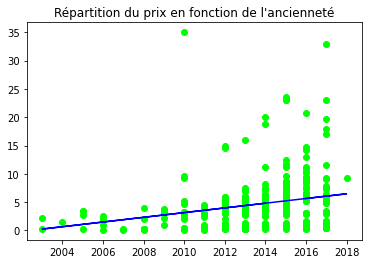

"\npredict = np.poly1d(model)\nage_ind = 2008\npredict(age_ind)\n[13:35]\nx_lin_reg = range(df['Year'].min(), df['Year'].max()+1)\ny_lin_reg = predict(x_lin_reg)\nplt.scatter(x, y)\nplt.plot(x_lin_reg, y_lin_reg, c = 'r')\n"

In [51]:
#plt.plot(fit)
#plt.plot(car_data['Year'])
plt.plot(car_data['Year'],car_data['Selling_Price'],linestyle = 'none',marker = 'o',c = 'lime')
plt.title("Répartition du prix en fonction de l'ancienneté")

# Régression Linéaire: La fonction polyfit renvoie le 'a' et le 'b' de la droite y=ax+b
#fit = np.polyfit(car_data['Year'], car_data['Selling_Price'], 1)
fit = np.polyfit(car_data['Year'], car_data['Selling_Price'], 1)
poly = np.poly1d(fit) # la valeur retournée est la fonction polynomiale
plt.plot(car_data['Year'],poly(car_data['Year']),c = 'blue')


plt.show()

"""
predict = np.poly1d(model)
age_ind = 2008
predict(age_ind)
[13:35]
x_lin_reg = range(df['Year'].min(), df['Year'].max()+1)
y_lin_reg = predict(x_lin_reg)
plt.scatter(x, y)
plt.plot(x_lin_reg, y_lin_reg, c = 'r')
"""



#### **2. Appliquer l’algorithme de régression linéaire univariée en vous aidant de la librairie ​Scipy.**

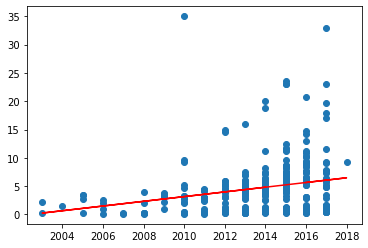

slope: 0.415092    intercept: -831.178925


In [52]:
from scipy import stats

slope, intercept, r_value, p_value, std_err = stats.linregress(car_data['Year'],car_data['Selling_Price'])
plt.plot(car_data['Year'], car_data['Selling_Price'],'o')
plt.plot(car_data['Year'], slope*car_data['Year'] + intercept, color="red" )
plt.show()
print("slope: %f    intercept: %f" % (slope, intercept))


In [ ]:
#### **4. Améliorer le modèle en utilisant plusieurs variables d'entrée​, telles que
`Kms_Driven` et `Transmission` (réaliser une régression linéaire multiple en Python
avec sklearn).
**

Pour rappel ... la régression linéaire est une méthode permettant de découvrir la relation
entre deux variables de l'ensemble de données, telles que le prix de la voiture et l'année de
fabrication. Les Data Scientists s'appuient sur cette méthode pour résoudre un large éventail
de problèmes, notamment en matière de prédiction.
Est-ce que notre jeux de données est adapté à ce type d'algorithme (ou existe-t-il une
corrélation linéaire entre les variables ?)
Proposer un outil de visualisation Matplotlib permettant d'appuyer votre argumentation.

## 6. Créer VOTRE Class LinearRegression. Ne pas utiliser de fonctions de régression linéaire existante (comme précédemment vue).

## 7. Pensez-vous possible de résoudre ce problème en implémentant un algorithme de Support Vector Machines (SVM)​ ? Justifier votre réponse.

## **8. Héberger vos sources sous github**

### https://github.com/jpphi/brief1

#### **Note de cours**  
Création d'un reposit sur github  
Dans le répertoire du brief  
faire un **git init**  
ajouter les fichiers concernés par **git add**  
commentaire et marquage des fichiers à dont la version à changer **git commit -am "message"**  
puis envoyer les modifications au serveur **git push origine master**

## 9. Proposer un dashboard comme livrable de votre étude

## 10. Question bonus : Vous avez trouvé votre voiture au meilleur prix, vous l’achetez. 3 jours après, vous êtes en panne. Quelles données manque-il à votre analyse ?

Il manque des données sur la fiabiltée des voitures en fonction de leur constructeurs, de leurs kilométrages (temps moyen de bon fonctionnement), de leur motorisation (les moteurs diesel ont une durée de vie plus longue en général),... Liste non exhautive. 

In [19]:
Nettoyer les données

SyntaxError: invalid syntax (<ipython-input-19-17d781fd5fd7>, line 1)

## DIVERS

### Web scraping

<p><b>Selenium: https://www.selenium.dev/documentation/fr/</b><br/>
Navigateur pour faire du scraping sur des sites demandant une identification<br/> 
Selenium n'es pas installé par défaut. C'est aussi une API python fournissant des fonctions</p>

#### Présentation des données

<p>
    https://ledatascientist.com/creer-un-modele-de-regression-lineaire-avec-python/ <br/>
    https://ledatascientist.com/regression-polynomiale-avec-python/<br/>
    over/under fitting
</p>